In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | nador
Processing Record 4 of Set 1 | papara
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | surdulica
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | pasni
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | wai
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | la ronge
Processing Record 14 of Set 1 | chapais
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | aswan
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | khartoum
Processing Record 21 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | olafsvik
Processing Record

Processing Record 38 of Set 4 | iroquois falls
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | poum
Processing Record 41 of Set 4 | muros
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | makung
City not found. Skipping...
Processing Record 44 of Set 4 | marolambo
Processing Record 45 of Set 4 | karimganj
Processing Record 46 of Set 4 | san quintin
Processing Record 47 of Set 4 | jamestown
Processing Record 48 of Set 4 | karaul
City not found. Skipping...
Processing Record 49 of Set 4 | kapaa
Processing Record 50 of Set 4 | namibe
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | port-gentil
Processing Record 3 of Set 5 | kapustin yar
Processing Record 4 of Set 5 | hohhot
Processing Record 5 of Set 5 | toliary
City not found. Skipping...
Processing Record 6 of Set 5 | frisco
Processing Record 7 of Set 5 | chirongui
Processing Record 8 of Set 5 | kanye
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of S

Processing Record 27 of Set 8 | kamiiso
Processing Record 28 of Set 8 | yerbogachen
Processing Record 29 of Set 8 | san carlos de bariloche
Processing Record 30 of Set 8 | santa rosa
Processing Record 31 of Set 8 | kloulklubed
Processing Record 32 of Set 8 | loandjili
Processing Record 33 of Set 8 | yanam
Processing Record 34 of Set 8 | eyl
Processing Record 35 of Set 8 | zaysan
Processing Record 36 of Set 8 | sabzevar
Processing Record 37 of Set 8 | basco
Processing Record 38 of Set 8 | kizukuri
Processing Record 39 of Set 8 | betki
City not found. Skipping...
Processing Record 40 of Set 8 | sanary-sur-mer
Processing Record 41 of Set 8 | parkersburg
Processing Record 42 of Set 8 | sambava
Processing Record 43 of Set 8 | iwanai
Processing Record 44 of Set 8 | usinsk
Processing Record 45 of Set 8 | katsuura
Processing Record 46 of Set 8 | walvis bay
Processing Record 47 of Set 8 | yar-sale
Processing Record 48 of Set 8 | batagay
Processing Record 49 of Set 8 | gat
Processing Record 50 o

Processing Record 11 of Set 12 | andes
Processing Record 12 of Set 12 | biak
Processing Record 13 of Set 12 | opuwo
Processing Record 14 of Set 12 | banda aceh
Processing Record 15 of Set 12 | baruun-urt
Processing Record 16 of Set 12 | urucara
Processing Record 17 of Set 12 | skjervoy
Processing Record 18 of Set 12 | nandurbar
Processing Record 19 of Set 12 | douglas
Processing Record 20 of Set 12 | pringsewu
Processing Record 21 of Set 12 | birjand
Processing Record 22 of Set 12 | north bend
Processing Record 23 of Set 12 | ambilobe
Processing Record 24 of Set 12 | broome
Processing Record 25 of Set 12 | ullapool
Processing Record 26 of Set 12 | burnie
Processing Record 27 of Set 12 | teeli
Processing Record 28 of Set 12 | mayachnyy
Processing Record 29 of Set 12 | brae
Processing Record 30 of Set 12 | thinadhoo
Processing Record 31 of Set 12 | lasa
Processing Record 32 of Set 12 | tire
Processing Record 33 of Set 12 | sukabumi
Processing Record 34 of Set 12 | iquitos
Processing Reco

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.14,74,11,17.05,PF,2022-04-09 00:34:04
1,Busselton,-33.6500,115.3333,61.02,59,23,10.47,AU,2022-04-09 00:34:05
2,Nador,35.1740,-2.9287,66.45,37,0,19.57,MA,2022-04-09 00:29:15
3,Papara,-3.9839,-38.7273,75.69,96,90,2.35,BR,2022-04-09 00:34:05
4,Vaini,-21.2000,-175.2000,87.96,70,40,4.61,TO,2022-04-09 00:34:06
5,Surdulica,42.6906,22.1708,50.27,83,28,3.60,RS,2022-04-09 00:34:06
6,Pasni,25.2631,63.4710,78.35,82,100,10.65,PK,2022-04-09 00:34:06
7,Iqaluit,63.7506,-68.5145,17.33,79,100,4.61,CA,2022-04-09 00:30:12
8,Pacific Grove,36.6177,-121.9166,69.75,69,0,11.50,US,2022-04-09 00:33:07
9,Wai,17.9333,73.9000,74.44,51,6,4.00,IN,2022-04-09 00:34:07


In [12]:
reordered_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[reordered_columns]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-09 00:34:04,-23.1203,-134.9692,79.14,74,11,17.05
1,Busselton,AU,2022-04-09 00:34:05,-33.6500,115.3333,61.02,59,23,10.47
2,Nador,MA,2022-04-09 00:29:15,35.1740,-2.9287,66.45,37,0,19.57
3,Papara,BR,2022-04-09 00:34:05,-3.9839,-38.7273,75.69,96,90,2.35
4,Vaini,TO,2022-04-09 00:34:06,-21.2000,-175.2000,87.96,70,40,4.61
5,Surdulica,RS,2022-04-09 00:34:06,42.6906,22.1708,50.27,83,28,3.60
6,Pasni,PK,2022-04-09 00:34:06,25.2631,63.4710,78.35,82,100,10.65
7,Iqaluit,CA,2022-04-09 00:30:12,63.7506,-68.5145,17.33,79,100,4.61
8,Pacific Grove,US,2022-04-09 00:33:07,36.6177,-121.9166,69.75,69,0,11.50
9,Wai,IN,2022-04-09 00:34:07,17.9333,73.9000,74.44,51,6,4.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

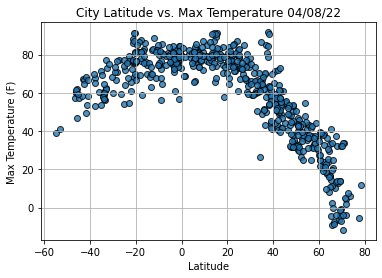

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

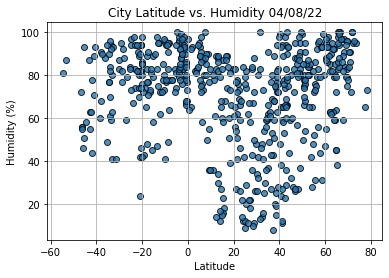

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

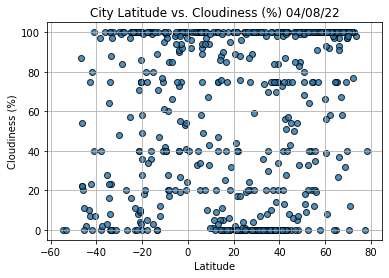

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

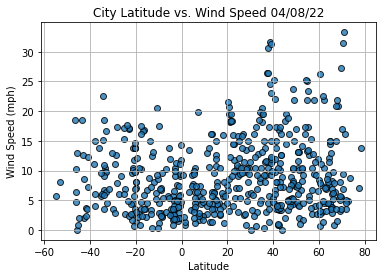

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-04-09 00:32:56
Lat                         -54.8
Lng                         -68.3
Max Temp                    38.86
Humidity                       81
Cloudiness                      0
Wind Speed                   5.75
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Nador,MA,2022-04-09 00:29:15,35.1740,-2.9287,66.45,37,0,19.57
5,Surdulica,RS,2022-04-09 00:34:06,42.6906,22.1708,50.27,83,28,3.60
6,Pasni,PK,2022-04-09 00:34:06,25.2631,63.4710,78.35,82,100,10.65
7,Iqaluit,CA,2022-04-09 00:30:12,63.7506,-68.5145,17.33,79,100,4.61
8,Pacific Grove,US,2022-04-09 00:33:07,36.6177,-121.9166,69.75,69,0,11.50


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

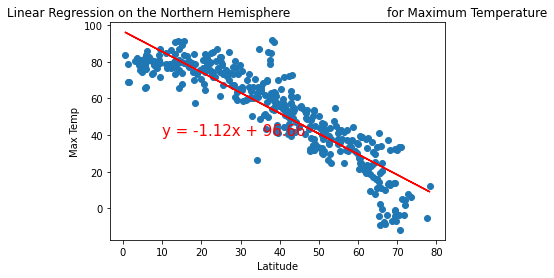

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

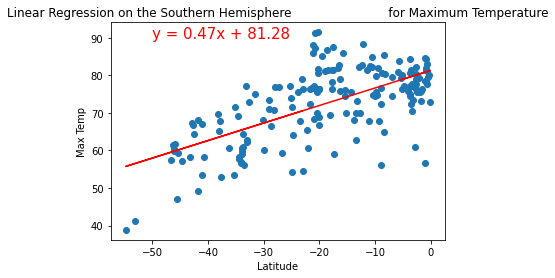

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

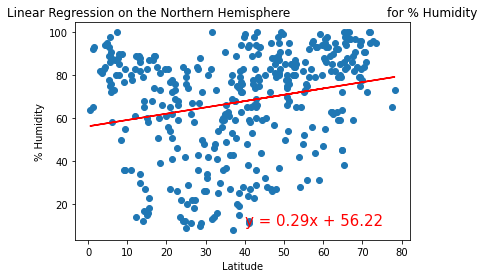

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

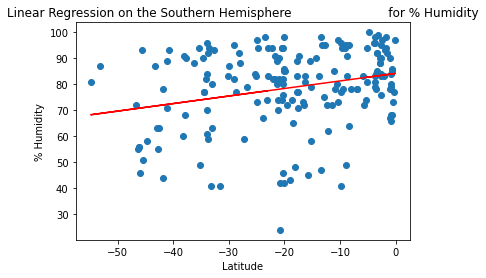

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

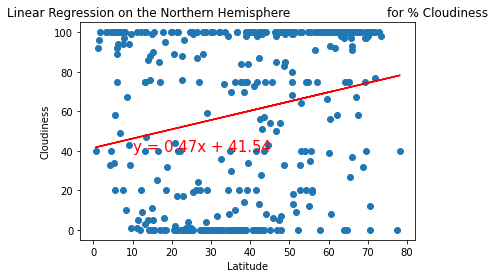

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(10,40))

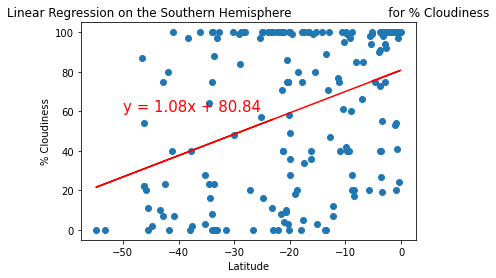

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

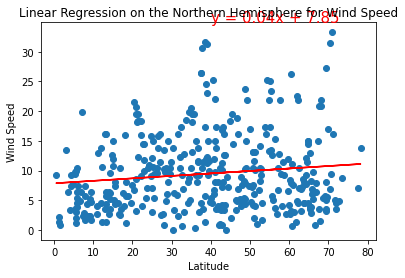

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

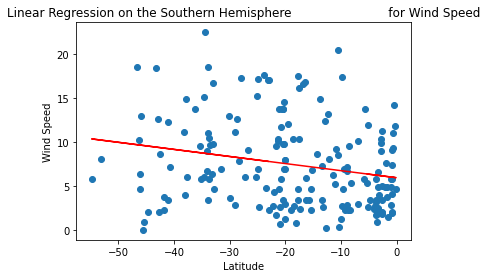

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))